Business Context
-	
-	Customer payment behavior is essential for a bank to control its financial risk. Meanwhile, the customer’s spending pattern could highly impact their bill repayment behavior, as with higher spending, there could be a higher chance of installments or defaults, resulting in fewer payments. Analyzing payment behaviors helps in assessing the credit risk associated with each segment. Customers who only make minimum payments regularly might represent a higher risk, and identifying them early can help in risk mitigation strategies. The bank could set business strategies to reduce the likelihood of the client defaulting on the bill payment in a broader view. By understanding customers’ purchasing habits, the company can create target marketing strategies like special offers on credit cards.
-	Since we are now focusing on spending and payments areas, we extracted 11 features out of 18 features to process the customer clustering as a new data frame for further analysis.
  - Defined variables:
    - Spending patterns: ‘PURCHASES','ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES','PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY','PURCHASES_TRX'
    - 'Payment behaviors: 'CREDIT_LIMIT', 'PAYMENTS','MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT'


In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import plotly.express as px


In [47]:
df = pd.read_csv('/Users/huiyisang/Desktop/Customer_Data.csv')

In [48]:
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [50]:
# Check number of unknowns
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [51]:
#missing value in Minimum Payments fill in zero if payment is zero, otherwise with the mean of payments
df['MINIMUM_PAYMENTS'] = df.apply(
    lambda row: 0 if row['PAYMENTS'] == 0 else (df['PAYMENTS'].median() if pd.isnull(row['MINIMUM_PAYMENTS']) else row['MINIMUM_PAYMENTS']),
    axis=1
)

In [52]:
#missing value in credit_limit
df = df.dropna(subset=['CREDIT_LIMIT'])

In [53]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [54]:
df1 = df[['PURCHASES','ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES','PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
'PURCHASES_INSTALLMENTS_FREQUENCY','PURCHASES_TRX','CREDIT_LIMIT', 'PAYMENTS','MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']]

Data Cleaning
-	The missing values were checked in the dataset, with 313 missing values in MINIMUM_PAYMENTS and 1 missing in CREDIT_LIMIT. We used the imputation technique to solve 313 missing based on the definition of MINIMUM_PAYMENTS. If the PAYMENTS is zero, meaning the user did not make any payment, the MINIMUM_PAYMENTS should also be zero. For the rest of the missing values, we impute the median of PAYMENTS to it. Since there is only one missing value in the CREDIT_LIMIT, we just dropped the row for that.
- Extracted 11 related variables we defined for business context as a new data frame ‘df1’ for EDA and Modeling


Exploratory Data Analysis (EDA)

In [55]:
df1.describe()

,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
count,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000
mean,1003.316936,592.503572,411.113579,0.490405,0.202480,0.364478,14.711476,4494.449450,1733.336511,841.065069,0.153732
std,2136.727848,1659.968851,904.378205,0.401360,0.298345,0.397451,24.858552,3638.815725,2895.168146,2334.879763,0.292511
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.000000,0.000000
25%,39.800000,0.000000,0.000000,0.083333,0.000000,0.000000,1.000000,1600.000000,383.282850,164.687639,0.000000
50%,361.490000,38.000000,89.000000,0.500000,0.083333,0.166667,7.000000,3000.000000,857.062706,299.935043,0.000000
75%,1110.170000,577.830000,468.650000,0.916667,0.300000,0.750000,17.000000,6500.000000,1901.279320,819.267218,0.142857
max,49039.570000,40761.250000,22500.000000,1.000000,1.000000,1.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000


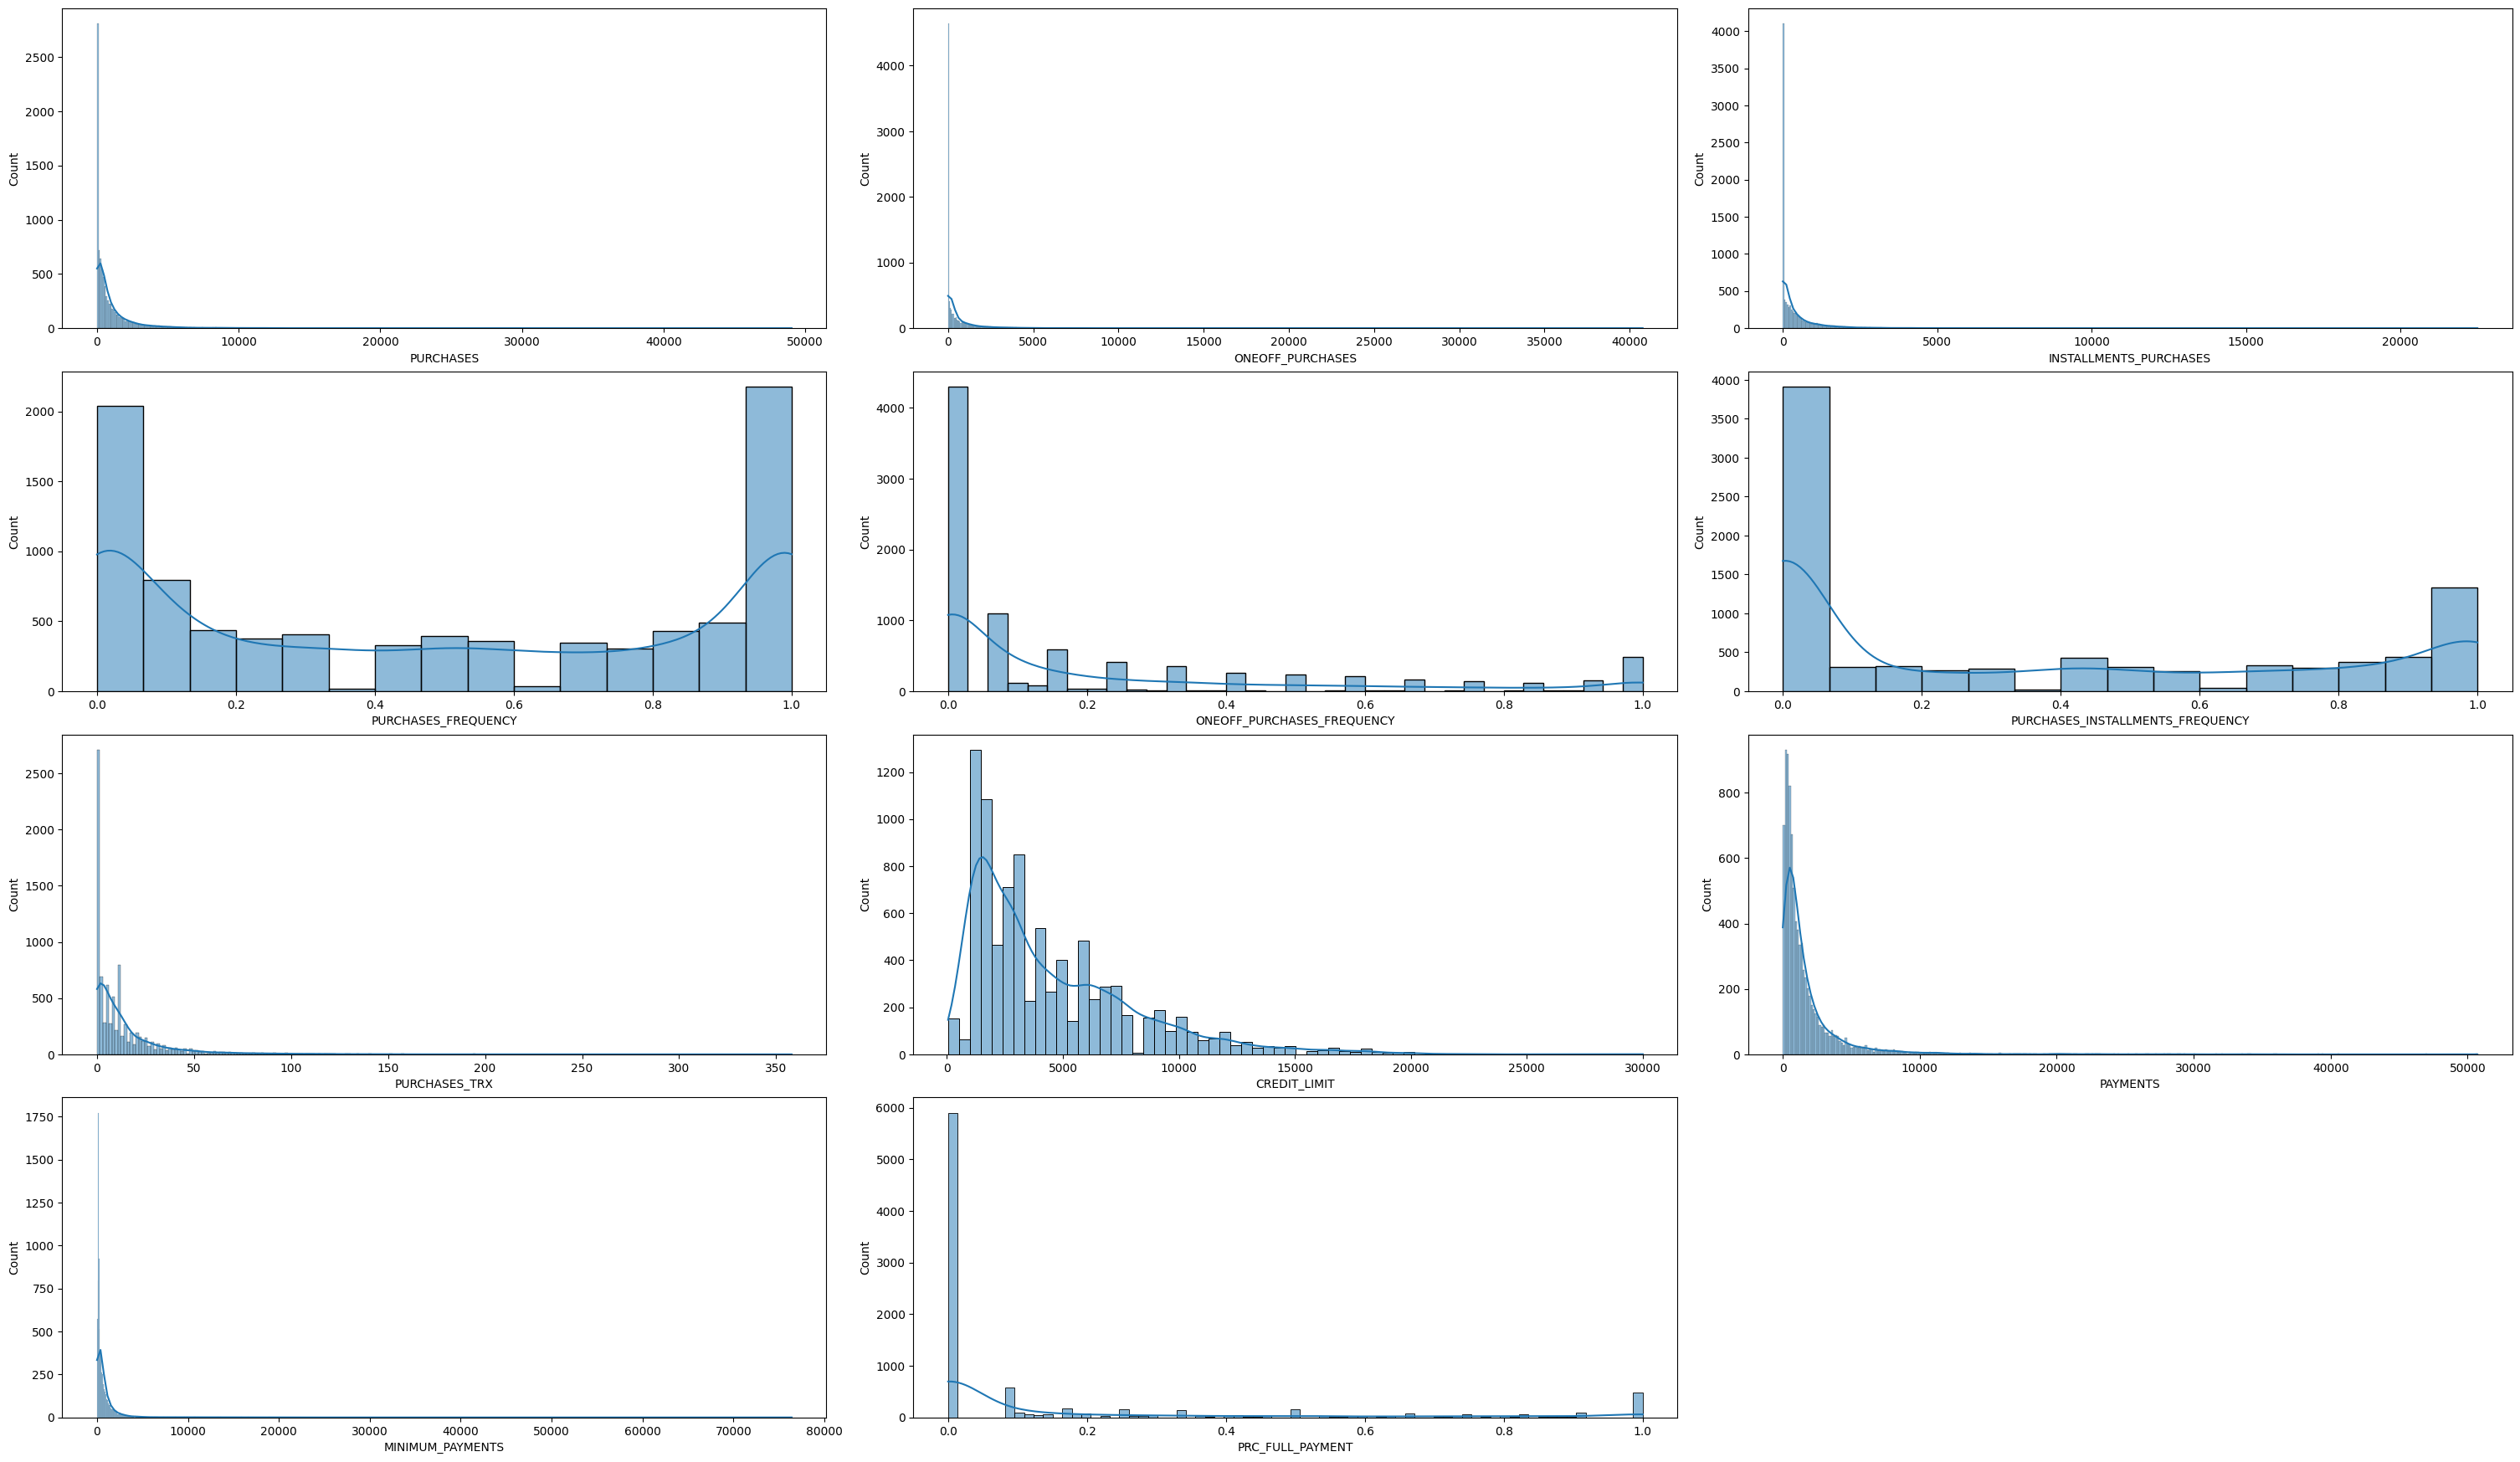

In [56]:
# creating distribution plot for analysis
fig = plt.figure(figsize=(30, 25), constrained_layout=True)
for i in range(len(df1.columns)):
    plt.subplot(6, 3, i+1)
    sns.histplot(df1[df1.columns[i]], kde=True)

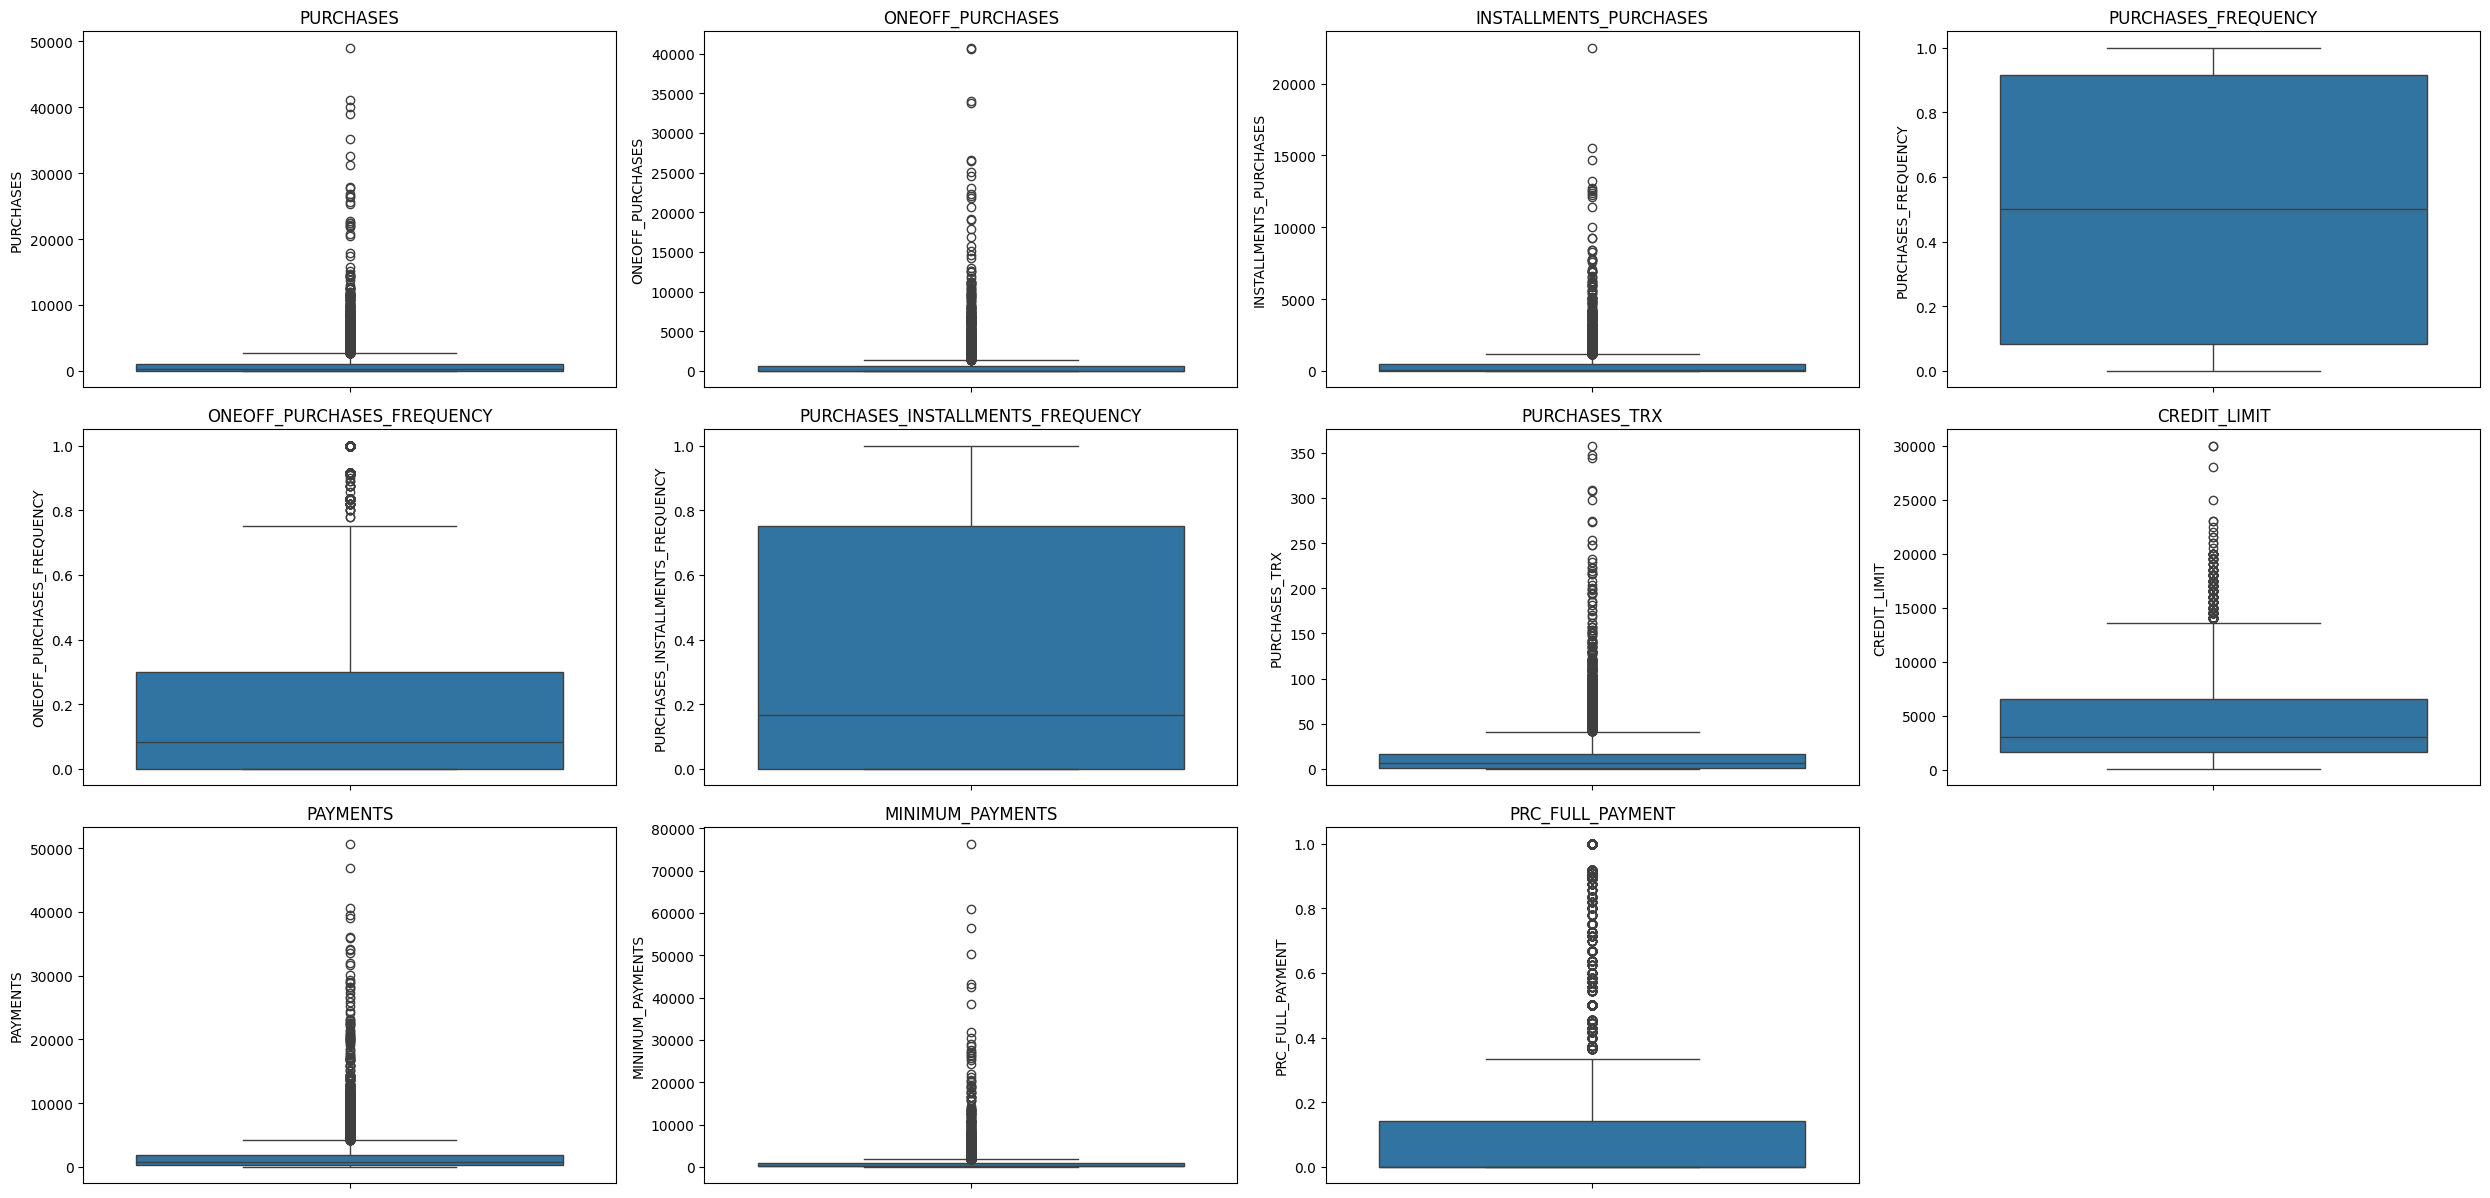

In [57]:
# plot for outliers detection

plt.figure(figsize=(25,20))
for i in range(len(df1.columns)):
    plt.subplot(5,4,i+1)
    sns.boxplot(df1[df1.columns[i]])
    plt.title(df1.columns[i])
    
plt.tight_layout()

In [58]:
#handling outlier with quantile
# Cap/floor outliers using quantiles
capped_data = df1.copy()
upper_bound = df1.quantile(0.9)
capped_data = capped_data.clip(upper=upper_bound, axis=1)

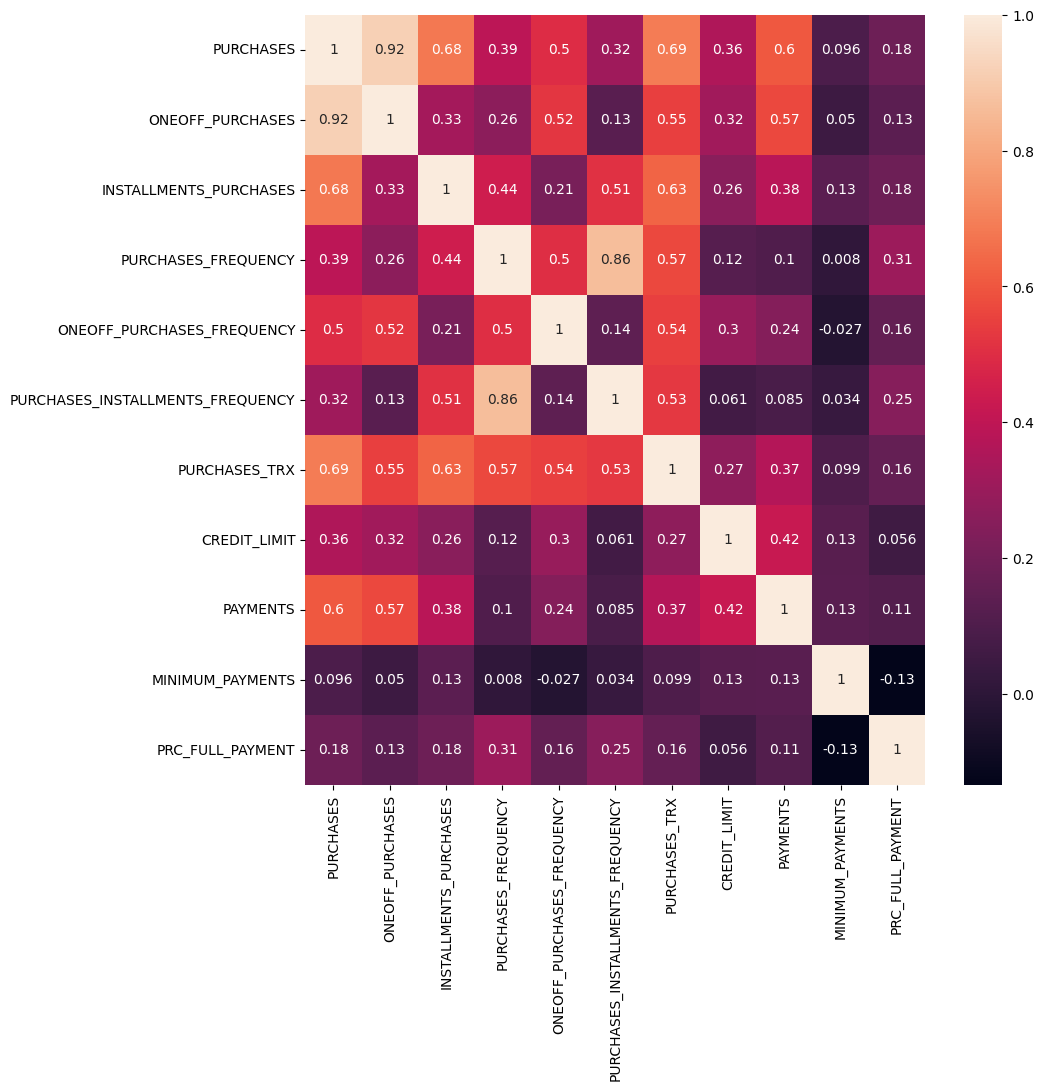

In [59]:
# calculates the correlations
correlation = df1.corr(method='pearson')

# uses the variable ax for single a Axes
fig, ax = plt.subplots()

# sets the figure size in inches
ax.figure.set_size_inches(10, 10)
sns.heatmap(correlation, annot=True);

# displays the plot
plt.show()

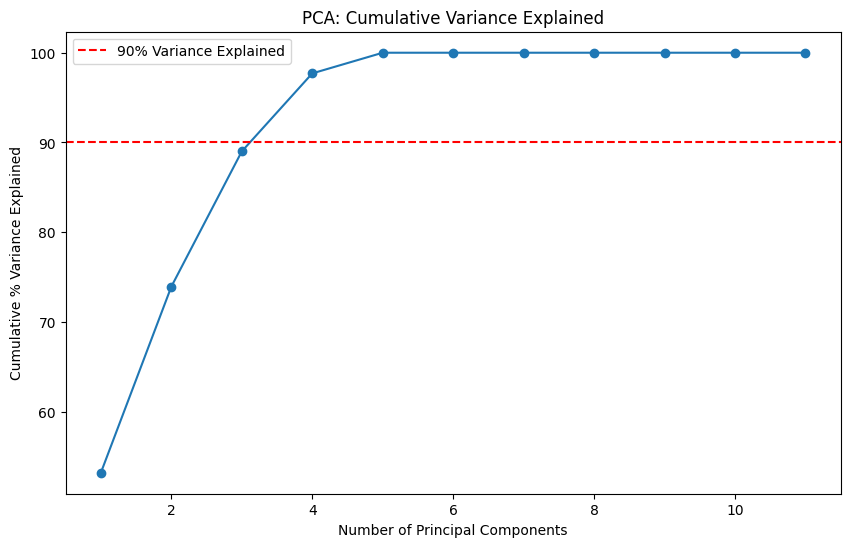

In [60]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Assuming your dataset is in a DataFrame called final_data
pca = PCA(n_components=len(df1.columns))
pca.fit(df1)

# Calculate the cumulative variance explained by each component
variance_explained = np.cumsum(pca.explained_variance_ratio_) * 100

# Plot the cumulative variance explained
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(variance_explained) + 1), variance_explained, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative % Variance Explained')
plt.title('PCA: Cumulative Variance Explained')
plt.axhline(y=90, color='r', linestyle='--', label='90% Variance Explained')
plt.legend()
plt.show()


In [61]:
# Use PCA to keep enough components to explain at least 90% of the variance
pca = PCA(n_components=0.9)  # Retain components explaining 90% variance
pca_data = pca.fit_transform(df1)

print(f"Number of components explaining 90% variance: {pca.n_components_}")

Number of components explaining 90% variance: 4


In [62]:
# Step 1: Feature Scaling
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df1)

# Step 2: Dimensionality Reduction using PCA
pca = PCA(n_components = 4)
data_pca = pca.fit_transform(data_scaled)

In [63]:
# Results after scaling and PCA
scaled_columns = pd.DataFrame(data_scaled)
pca_columns = pd.DataFrame(data_pca, columns=[f'PC{i+1}' for i in range(data_pca.shape[1])])

In [64]:
pca_columns

,PC1,PC2,PC3,PC4
0,-0.492363,-0.110175,-0.034649,-0.089333
1,-0.610514,-0.012425,0.199910,0.129689
2,0.281026,0.859208,-0.389648,-0.168557
3,-0.575703,0.021734,-0.045598,0.105281
4,-0.583542,-0.005773,-0.038859,-0.076064
...,...,...,...,...
8944,0.667378,-0.303275,0.290554,-0.156604
8945,0.567891,-0.403338,-0.188871,-0.160090
8946,0.394499,-0.287082,0.082687,-0.150457
8947,-0.612635,-0.035296,0.232752,-0.072135


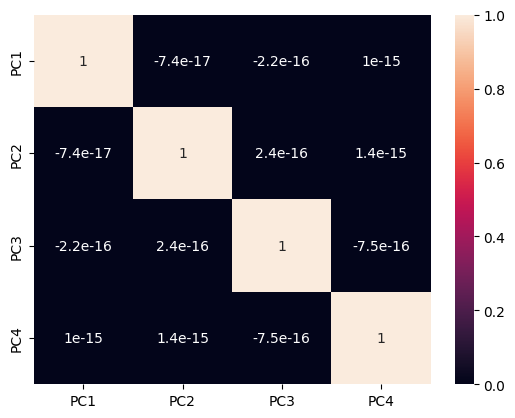

In [66]:
#Heatmap check
sns.heatmap(pca_columns.corr(), annot=True);

Modeling
- K-MEANS
- DBSCAN
- K-Meoids

K-means

In [67]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Handling Warning
import warnings
warnings.filterwarnings('ignore')

In [68]:
inertia = []
silh = []

for i in range(2,10):
    kmeans = KMeans(n_clusters = i) 
    kmeans.fit(pca_columns)
    inertia.append(kmeans.inertia_)
    silh.append(silhouette_score(pca_columns, kmeans.labels_))

In [69]:
inertia

[2136.144959849082,
 1668.837858873172,
 1374.1702479545756,
 1076.1110785080643,
 900.4037558101959,
 766.6276293616021,
 680.739915977424,
 562.0249668548341]

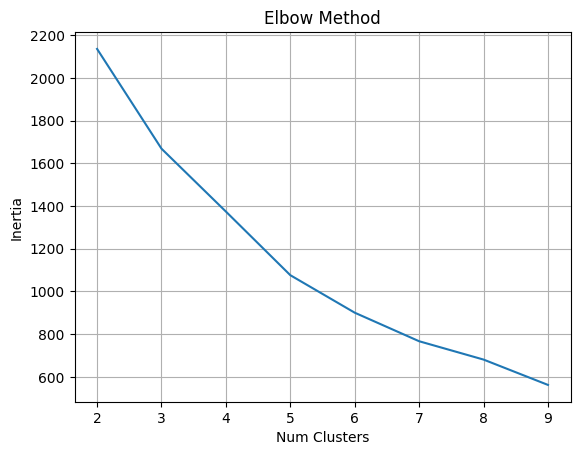

In [70]:
plt.plot(range(2,10), inertia)
plt.title('Elbow Method')
plt.xlabel('Num Clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show()

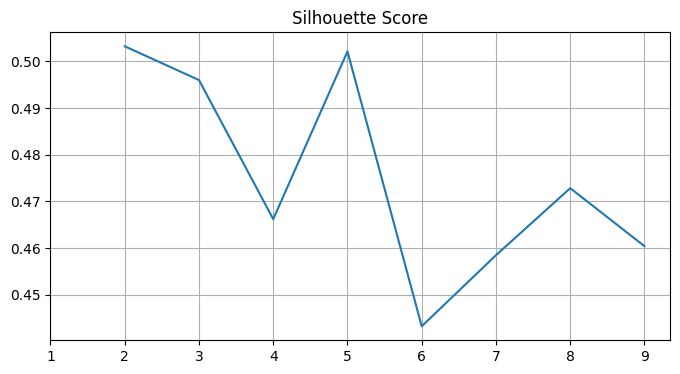

In [71]:
plt.figure(figsize = (8,4))
plt.plot(range(2,10), silh)
plt.title('Silhouette Score')
plt.xticks(range(1,10))
plt.grid()
plt.show()

In [72]:
# Choosing cluster 
kmeans = KMeans(n_clusters=4)
kmeans.fit(pca_columns)
kmeans_labels = kmeans.labels_

DBSCAN

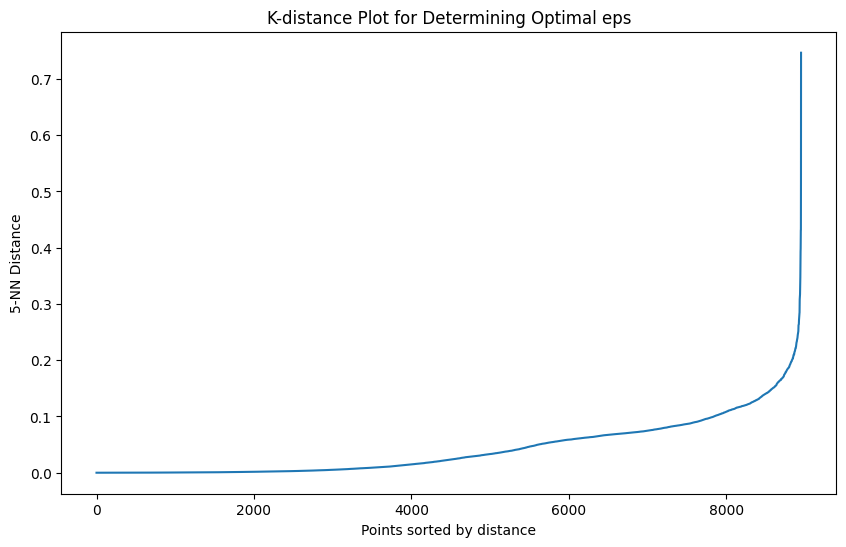

In [73]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

# Set the number of neighbors to min_samples
min_samples = 5
neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors_fit = neighbors.fit(pca_columns.iloc[:, :4]) 
distances, indices = neighbors_fit.kneighbors(pca_columns.iloc[:, :4])

# Sort the distances and plot them
distances = np.sort(distances[:, min_samples - 1])  # Only take the distance to the k-th neighbor
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.xlabel("Points sorted by distance")
plt.ylabel(f"{min_samples}-NN Distance")
plt.title("K-distance Plot for Determining Optimal eps")
plt.show()

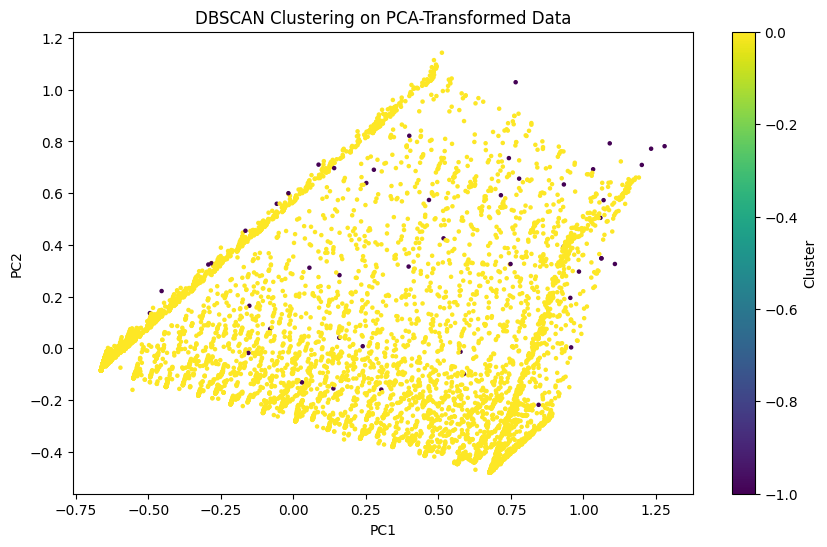

Number of clusters found: 2
Cluster labels: {0, -1}


In [74]:
# Step 1: Initialize DBSCAN model
# Note: eps and min_samples may need adjustment for optimal results

eps = 0.2  # Replace with the value you found from the k-distance plot
dbscan = DBSCAN(eps=eps)  # you might want to tune these parameters

# Step 2: Fit the model
dbscan_model = dbscan.fit(pca_columns)

# Step 3: Add the cluster labels to the PCA DataFrame
dbscan_labels = dbscan_model.labels_

# Optional: Visualize the clusters in the first two principal components
plt.figure(figsize=(10, 6))
plt.scatter(pca_columns['PC1'], pca_columns['PC2'], c=dbscan_labels, cmap='viridis', s=5)
plt.colorbar(label='Cluster')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('DBSCAN Clustering on PCA-Transformed Data')
plt.show()

# Check the number of unique clusters
unique_clusters = set(dbscan_labels)
print(f"Number of clusters found: {len(unique_clusters)}")
print(f"Cluster labels: {unique_clusters}")

K-Medoids

In [75]:
inertia = []
silh = []

for i in range(2,10):
    kmedoids = KMedoids(n_clusters = i) 
    kmedoids.fit(pca_columns)
    inertia.append(kmedoids.inertia_)
    silh.append(silhouette_score(pca_columns, kmedoids.labels_))

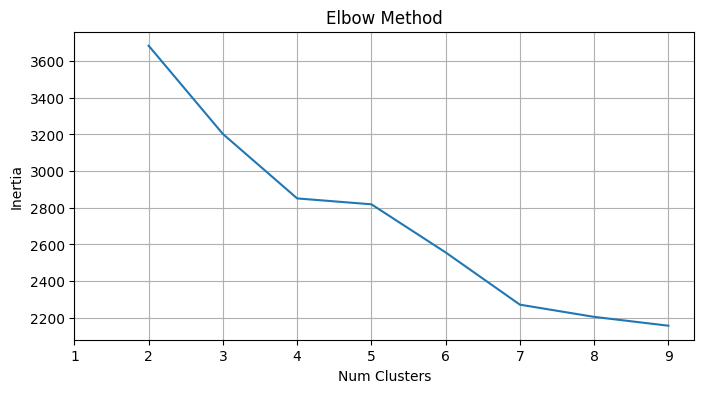

In [76]:
plt.figure(figsize = (8,4))
plt.plot(range(2,10), inertia)
plt.title('Elbow Method')
plt.xlabel('Num Clusters')
plt.ylabel('Inertia')
plt.xticks(range(1,10))
plt.grid()
plt.show()

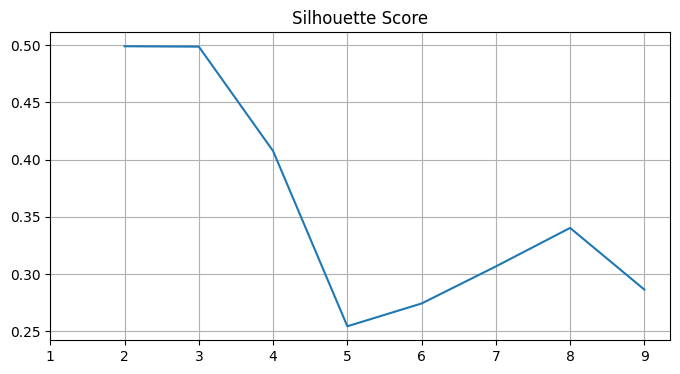

In [77]:
plt.figure(figsize = (8,4))
plt.plot(range(2,10), silh)
plt.title('Silhouette Score')
plt.xticks(range(1,10))
plt.grid()
plt.show()

In [78]:
# Final decision on numbers of cluster chosen: 3

kmedoids = KMedoids(n_clusters = 3)
kmedoids.fit(pca_columns)
kmedoids_labels = kmedoids.labels_

Evaluation

In [79]:
# K-Means silhouette score
kmeans_silhouette = silhouette_score(pca_columns.iloc[:, :4], kmeans_labels)
print("K-Means Silhouette Score:", kmeans_silhouette)

# DBSCAN silhouette score
dbscan_silhouette = silhouette_score(pca_columns.iloc[:, :4], dbscan_labels)
print("DBSCAN Silhouette Score:", dbscan_silhouette)

# For K-Medoids
kmedoids_silhouette = silhouette_score(pca_columns.iloc[:, :4], kmedoids_labels)
print("K-Medoids Silhouette Score:", kmedoids_silhouette)

K-Means Silhouette Score: 0.5108214272388922
DBSCAN Silhouette Score: 0.2860222266695978
K-Medoids Silhouette Score: 0.4987438376261339


In [80]:
# Count of clusters and noise in DBSCAN
unique_clusters_dbscan = pd.Series(dbscan_labels).value_counts()
print("DBSCAN Cluster Distribution:\n", unique_clusters_dbscan)

# Count of clusters in K-Means
unique_clusters_kmeans = pd.Series(kmeans_labels).value_counts()
print("K-Means Cluster Distribution:\n", unique_clusters_kmeans)

# K-Medoids cluster distribution
unique_clusters_kmedoids = pd.Series(kmedoids_labels).value_counts()
print("K-Medoids Cluster Distribution:\n", unique_clusters_kmedoids)

DBSCAN Cluster Distribution:
  0    8901
-1      48
Name: count, dtype: int64
K-Means Cluster Distribution:
 0    4580
1    2219
2    1217
3     933
Name: count, dtype: int64
K-Medoids Cluster Distribution:
 2    4571
0    2895
1    1483
Name: count, dtype: int64


In [81]:
print("K-Means Inertia:", kmeans.inertia_)

print("K-Medoids Inertia:", kmedoids.inertia_)

K-Means Inertia: 1252.115664976457
K-Medoids Inertia: 3202.4493202769972


In [82]:
from sklearn.metrics import davies_bouldin_score

# K-Means DBI
kmeans_dbi = davies_bouldin_score(pca_columns.iloc[:, :4], kmeans_labels)
print("K-Means Davies-Bouldin Index:", kmeans_dbi)

# DBSCAN DBI
dbscan_dbi = davies_bouldin_score(pca_columns.iloc[:, :4], dbscan_labels)
print("DBSCAN Davies-Bouldin Index:", dbscan_dbi)

# K-Medoids DBI
kmedoids_dbi = davies_bouldin_score(pca_columns.iloc[:, :4], kmedoids_labels)
print("K-Medoids Davies-Bouldin Index:", kmedoids_dbi)


K-Means Davies-Bouldin Index: 0.9562845689364128
DBSCAN Davies-Bouldin Index: 1.5949391840646432
K-Medoids Davies-Bouldin Index: 1.0914792259659372


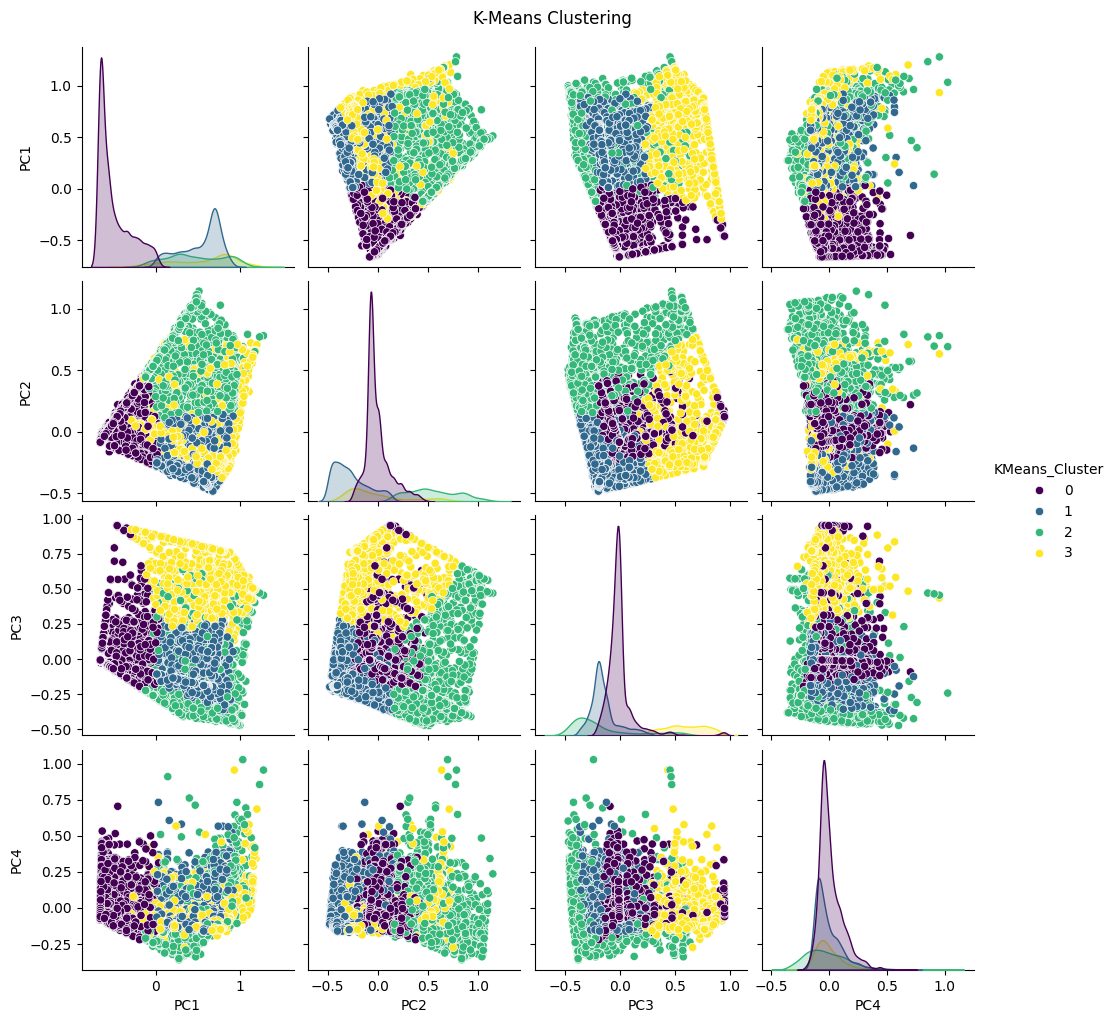

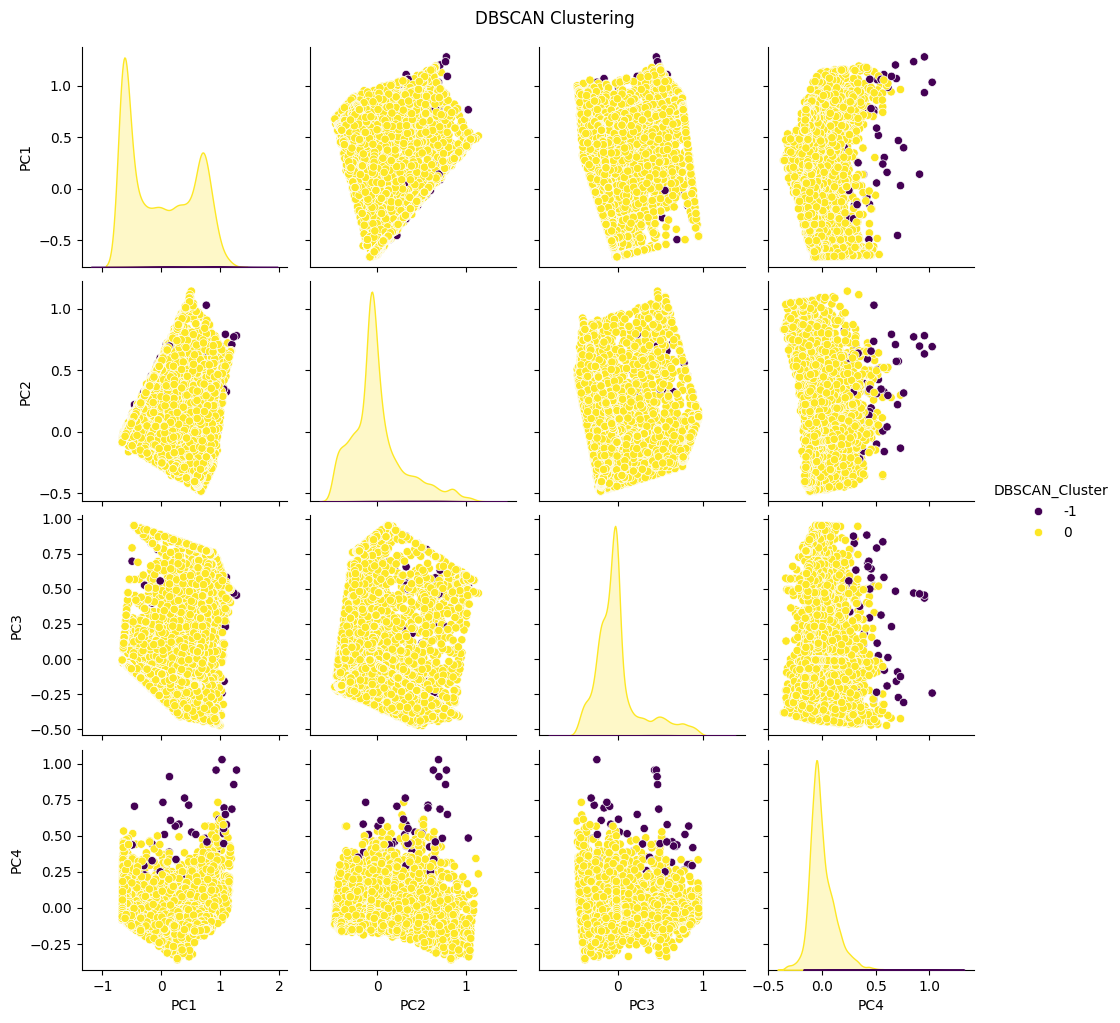

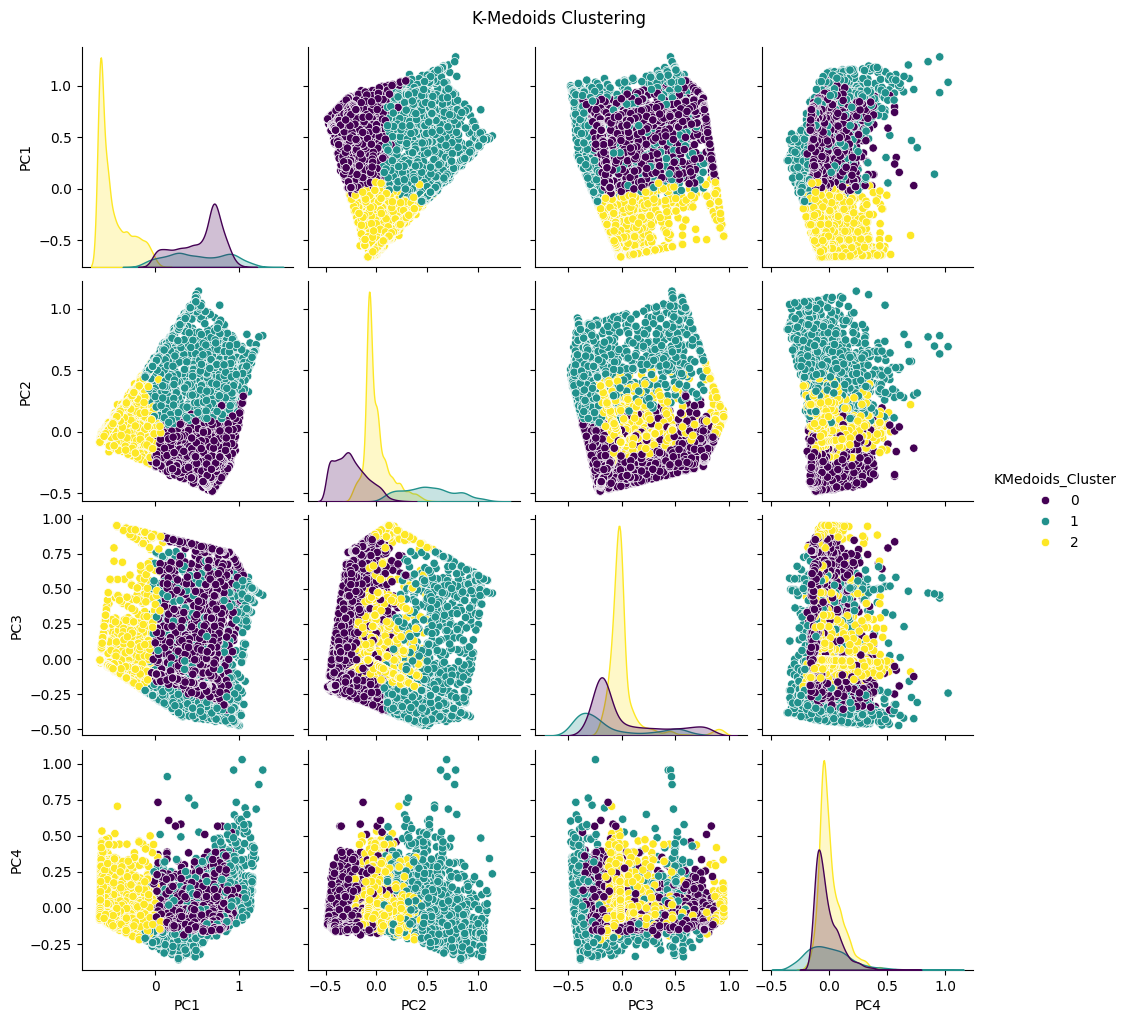

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

# Adding labels to the PCA DataFrame for visualization
pca_columns['KMeans_Cluster'] = kmeans_labels
pca_columns['DBSCAN_Cluster'] = dbscan_labels
pca_columns['KMedoids_Cluster'] = kmedoids_labels

# Pair plots for K-Means
sns.pairplot(pca_columns, vars=['PC1', 'PC2', 'PC3', 'PC4'], hue='KMeans_Cluster', palette='viridis')
plt.suptitle("K-Means Clustering", y=1.02)
plt.show()

# Pair plots for DBSCAN
sns.pairplot(pca_columns, vars=['PC1', 'PC2', 'PC3', 'PC4'], hue='DBSCAN_Cluster', palette='viridis')
plt.suptitle("DBSCAN Clustering", y=1.02)
plt.show()

# Pair plots for K-Medoids
sns.pairplot(pca_columns, vars=['PC1', 'PC2', 'PC3', 'PC4'], hue='KMedoids_Cluster', palette='viridis')
plt.suptitle("K-Medoids Clustering", y=1.02)
plt.show()


K-Means is the best

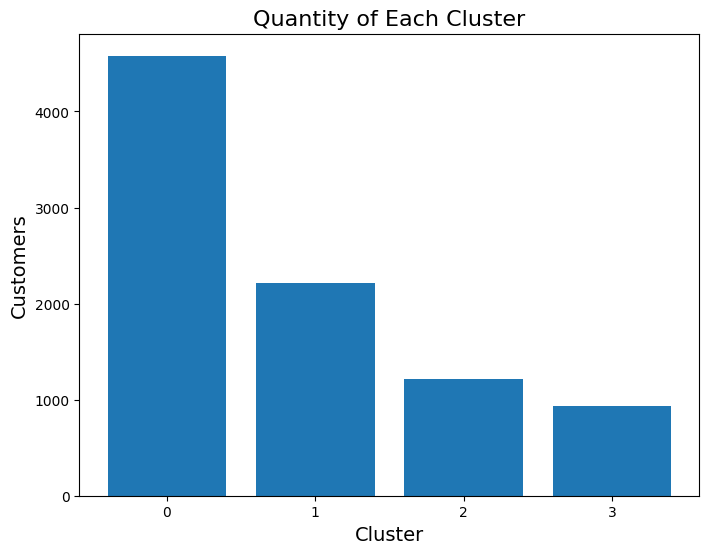

Cluster 0: 4580
Cluster 1: 2219
Cluster 2: 1217
Cluster 3: 933


In [84]:
labels, counts = np.unique(kmeans_labels, return_counts = True)

plt.figure(figsize = (8,6))
plt.title('Quantity of Each Cluster', size = 16)
plt.bar(labels, counts)
plt.xlabel('Cluster', size = 14)
plt.ylabel('Customers', size = 14)
plt.xticks(labels)
plt.show()

for i in zip(labels, counts):
    print('Cluster %s: %s' %(i[0],i[1]))

In [85]:
loadings = pca.components_

# Create a DataFrame with the loadings
loadings_df = pd.DataFrame(loadings, columns=df1.columns, index=[f'PC{i+1}' for i in range(len(loadings))])
print(loadings_df)

     PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  PURCHASES_FREQUENCY  \
PC1   0.032957          0.019989                0.035631             0.690963   
PC2   0.048367          0.060525               -0.004260             0.071826   
PC3  -0.009887         -0.011230               -0.001194            -0.134796   
PC4   0.139007          0.102995                0.116397            -0.316726   

     ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
PC1                    0.241854                          0.644168   
PC2                    0.841328                         -0.471759   
PC3                   -0.239571                         -0.055049   
PC4                    0.013117                          0.251954   

     PURCHASES_TRX  CREDIT_LIMIT  PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  
PC1       0.075295      0.029981  0.014256          0.000247          0.198991  
PC2       0.056799      0.115918  0.041934         -0.006128          0.199929  
PC3  

In [86]:
final_data = pca_columns.copy()
final_data['Label'] = kmeans_labels

final_data.head()

,PC1,PC2,PC3,PC4,KMeans_Cluster,DBSCAN_Cluster,KMedoids_Cluster,Label
0,-0.492363,-0.110175,-0.034649,-0.089333,0,0,2,0
1,-0.610514,-0.012425,0.199910,0.129689,0,0,2,0
2,0.281026,0.859208,-0.389648,-0.168557,2,0,1,2
3,-0.575703,0.021734,-0.045598,0.105281,0,0,2,0
4,-0.583542,-0.005773,-0.038859,-0.076064,0,0,2,0


In [87]:
# Calculate mean values of each feature by cluster
cluster_summary = final_data.groupby('Label').mean()

cluster_summary_df = cluster_summary.reset_index()
print(cluster_summary_df.reset_index())

   index  Label       PC1       PC2       PC3       PC4  KMeans_Cluster  \
0      0      0 -0.498728 -0.009784 -0.003814  0.010342             0.0   
1      1      1  0.531290 -0.270787 -0.151088 -0.012983             1.0   
2      2      2  0.473066  0.546515 -0.161450 -0.015746             2.0   
3      3      3  0.567547 -0.020814  0.588659  0.000647             3.0   

   DBSCAN_Cluster  KMedoids_Cluster  
0       -0.001310          1.955459  
1       -0.001803          0.042812  
2       -0.016434          1.002465  
3       -0.019293          0.379421  


In [88]:
for i in range(4):
    print('Cluster:', i)
    display(final_data[final_data['Label'] == i].describe())
    print('\n')

Cluster: 0


,PC1,PC2,PC3,PC4,KMeans_Cluster,DBSCAN_Cluster,KMedoids_Cluster,Label
count,4580.000000,4580.000000,4580.000000,4580.000000,4580.0,4580.000000,4580.000000,4580.0
mean,-0.498728,-0.009784,-0.003814,0.010342,0.0,-0.001310,1.955459,0.0
std,0.192647,0.124170,0.141696,0.103302,0.0,0.036175,0.287663,0.0
min,-0.662671,-0.264011,-0.217828,-0.220260,0.0,-1.000000,0.000000,0.0
25%,-0.657567,-0.079775,-0.063937,-0.054649,0.0,0.000000,2.000000,0.0
50%,-0.580563,-0.053326,-0.014364,-0.016816,0.0,0.000000,2.000000,0.0
75%,-0.379537,0.028957,-0.007829,0.057678,0.0,0.000000,2.000000,0.0
max,0.055062,0.489318,0.951749,0.704125,0.0,0.000000,2.000000,0.0




Cluster: 1


,PC1,PC2,PC3,PC4,KMeans_Cluster,DBSCAN_Cluster,KMedoids_Cluster,Label
count,2219.000000,2219.000000,2219.000000,2219.000000,2219.0,2219.000000,2219.000000,2219.0
mean,0.531290,-0.270787,-0.151088,-0.012983,1.0,-0.001803,0.042812,1.0
std,0.236177,0.169512,0.125632,0.113365,0.0,0.042428,0.202479,0.0
min,0.007283,-0.481537,-0.382699,-0.174104,1.0,-1.000000,0.000000,1.0
25%,0.352062,-0.406963,-0.219571,-0.094841,1.0,0.000000,0.000000,1.0
50%,0.622875,-0.308515,-0.185056,-0.048454,1.0,0.000000,0.000000,1.0
75%,0.705734,-0.162934,-0.118744,0.044230,1.0,0.000000,0.000000,1.0
max,0.917768,0.158403,0.280758,0.731541,1.0,0.000000,1.000000,1.0




Cluster: 2


,PC1,PC2,PC3,PC4,KMeans_Cluster,DBSCAN_Cluster,KMedoids_Cluster,Label
count,1217.000000,1217.000000,1217.000000,1217.000000,1217.0,1217.000000,1217.000000,1217.0
mean,0.473066,0.546515,-0.161450,-0.015746,2.0,-0.016434,1.002465,2.0
std,0.335773,0.244696,0.296968,0.194717,0.0,0.127189,0.049609,0.0
min,-0.134735,0.115169,-0.473938,-0.358842,2.0,-1.000000,1.000000,2.0
25%,0.224756,0.353186,-0.384551,-0.158743,2.0,0.000000,1.000000,2.0
50%,0.445468,0.515321,-0.267889,-0.047048,2.0,0.000000,1.000000,2.0
75%,0.773516,0.739828,-0.064933,0.100692,2.0,0.000000,1.000000,2.0
max,1.279436,1.143219,0.663868,1.027187,2.0,0.000000,2.000000,2.0




Cluster: 3


,PC1,PC2,PC3,PC4,KMeans_Cluster,DBSCAN_Cluster,KMedoids_Cluster,Label
count,933.000000,933.000000,933.000000,933.000000,933.0,933.000000,933.000000,933.0
mean,0.567547,-0.020814,0.588659,0.000647,3.0,-0.019293,0.379421,3.0
std,0.368528,0.296443,0.188149,0.127242,0.0,0.137625,0.671048,0.0
min,-0.293015,-0.372064,0.132632,-0.273670,3.0,-1.000000,0.000000,3.0
25%,0.261579,-0.247046,0.443291,-0.081207,3.0,0.000000,0.000000,3.0
50%,0.669559,-0.129488,0.593534,-0.028737,3.0,0.000000,0.000000,3.0
75%,0.857351,0.092950,0.757902,0.053776,3.0,0.000000,1.000000,3.0
max,1.200925,0.771476,0.924318,0.954832,3.0,0.000000,2.000000,3.0


In [95]:
pca_columns.describe()

,PC1,PC2,PC3,PC4,KMeans_Cluster,DBSCAN_Cluster,KMedoids_Cluster
count,8.949000e+03,8.949000e+03,8.949000e+03,8.949000e+03,8949.000000,8949.000000,8949.000000
mean,1.056008e-16,-2.223175e-17,-3.652360e-17,7.939912e-19,0.832719,-0.005364,1.187283
std,5.688761e-01,3.019990e-01,2.742328e-01,1.249623e-01,1.018305,0.073045,0.894034
min,-6.626708e-01,-4.815369e-01,-4.739378e-01,-3.588423e-01,0.000000,-1.000000,0.000000
25%,-5.814897e-01,-1.750262e-01,-1.670095e-01,-7.649975e-02,0.000000,0.000000,0.000000
50%,-7.960720e-02,-6.148148e-02,-4.053176e-02,-2.833578e-02,0.000000,0.000000,2.000000
75%,5.773560e-01,9.742326e-02,2.266460e-02,5.827749e-02,1.000000,0.000000,2.000000
max,1.279436e+00,1.143219e+00,9.517492e-01,1.027187e+00,3.000000,0.000000,2.000000


<Axes: >

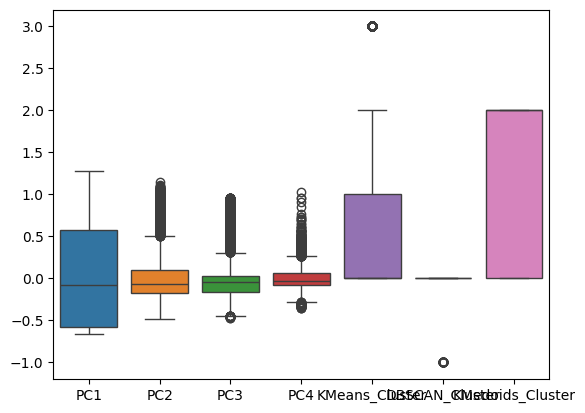

In [96]:
sns.boxplot(pca_columns)

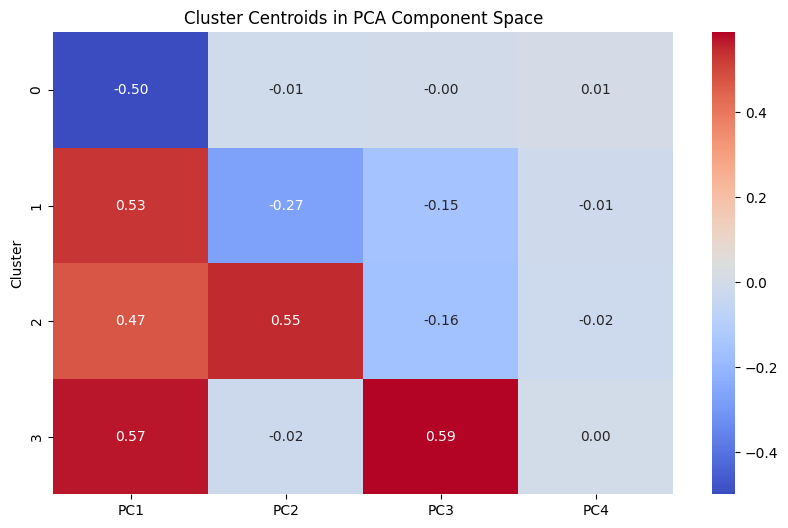

In [89]:
# Assuming `pca_data` is your PCA-transformed data and `kmeans` is the K-means model
cluster_centroids = pd.DataFrame(kmeans.cluster_centers_, columns=[f'PC{i+1}' for i in range(4)])
cluster_centroids.index.name = 'Cluster'

# Plot the centroids
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_centroids, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Cluster Centroids in PCA Component Space")
plt.show()

In [97]:
pca_means = pca_data.mean()


In [98]:
# 计算每个cluster的PCA成分均值与总体均值的差值
difference_from_avg = cluster_centroids - pca_means
print("Difference from Overall PCA Component Means:\n", difference_from_avg)

Difference from Overall PCA Component Means:
               PC1       PC2       PC3       PC4
Cluster                                        
0       -0.498728 -0.009784 -0.003814  0.010342
1        0.531320 -0.270787 -0.151276 -0.012947
2        0.473066  0.546515 -0.161450 -0.015746
3        0.567437 -0.021084  0.588314  0.000547


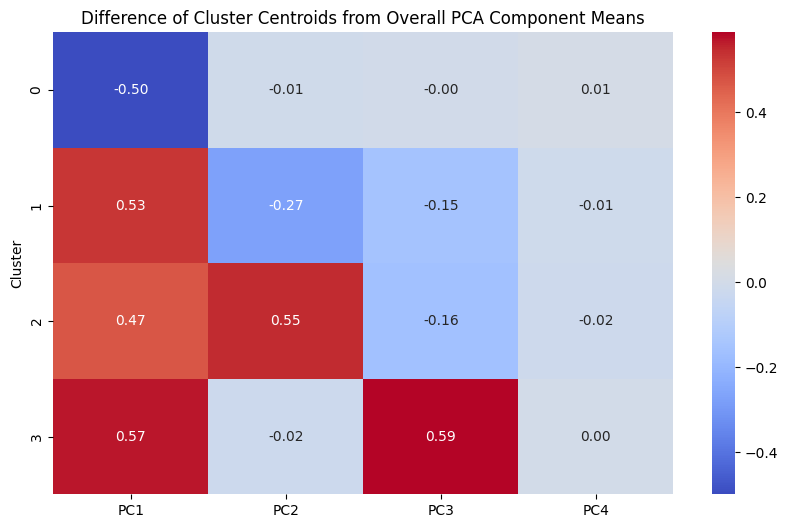

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt

# 可视化每个cluster与PCA成分总体均值的差值
plt.figure(figsize=(10, 6))
sns.heatmap(difference_from_avg, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Difference of Cluster Centroids from Overall PCA Component Means")
plt.show()

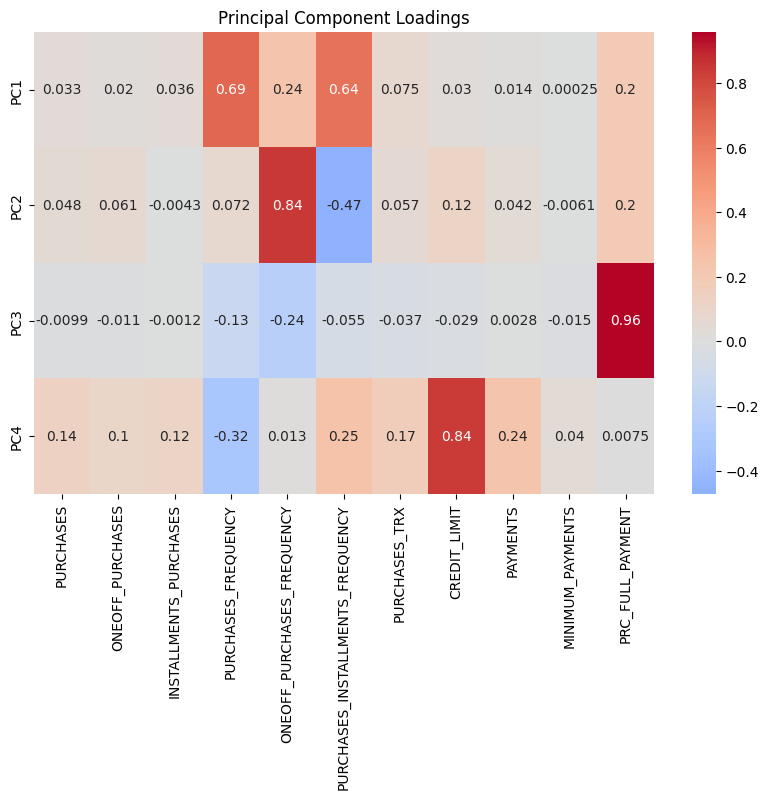

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt

loadings = pd.DataFrame(pca.components_, columns=df1.columns, index=[f'PC{i+1}' for i in range(4)])

plt.figure(figsize=(10, 6))
sns.heatmap(loadings, annot=True, cmap='coolwarm', center=0)
plt.title("Principal Component Loadings")
plt.show()

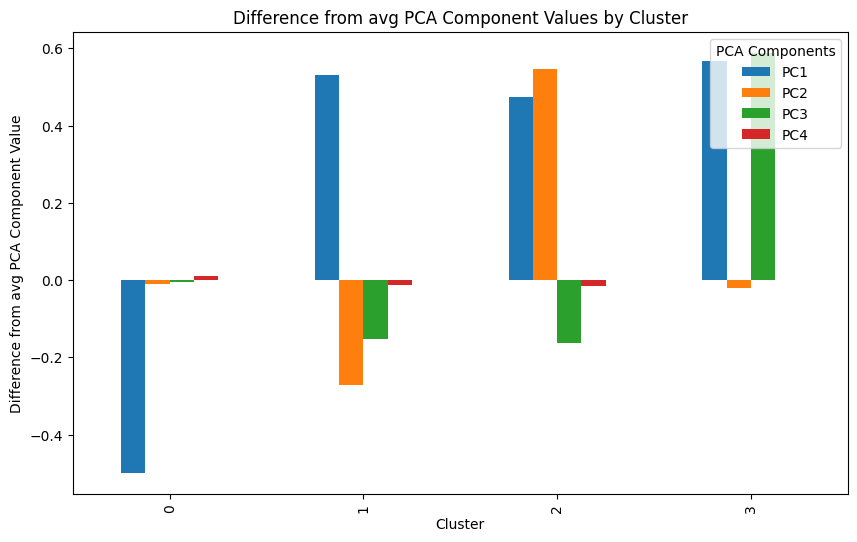

In [106]:
import matplotlib.pyplot as plt

# 假设 cluster_centroids 是包含每个簇在各个PCA成分上的均值的DataFrame
# cluster_centroids.columns = ['PC1', 'PC2', 'PC3', 'PC4']
# cluster_centroids.index = cluster labels, such as 0, 1, 2, 3

# 使用 bar chart 展示每个簇在不同PCA成分上的均值
difference_from_avg.plot(kind='bar', figsize=(10, 6))

# 添加标题和坐标轴标签
plt.title("Difference from avg PCA Component Values by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Difference from avg PCA Component Value")
plt.legend(title="PCA Components", loc="upper right")
plt.show()